In [1]:
# Required Libraries

import pandas as pd
import numpy as np

# Model Selection
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor,plot_tree
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
import plotly.graph_objects as go

import warnings

warnings.filterwarnings('ignore')

# 1.Problem Statement:

To predict the price of pizza by using features


# 2.Data Gathering

In [2]:
df=pd.read_csv("pizza_v2.csv")
df

company price_rupiah  diameter      topping           variant     size  \
0         A    Rp235,000   22 inch      chicken  double_signature    jumbo   
1         A    Rp198,000   20 inch    papperoni  double_signature    jumbo   
2         A    Rp120,000   16 inch    mushrooms  double_signature  reguler   
3         A    Rp155,000   14 inch  smoked_beef  double_signature  reguler   
4         A    Rp248,000   18 inch   mozzarella  double_signature    jumbo   
..      ...          ...       ...          ...               ...      ...   
121       E     Rp49,000   12 inch  smoked_beef           crunchy   medium   
122       E     Rp83,000   17 inch      chicken          new_york       XL   
123       E     Rp96,000   12 inch    mushrooms     double_decker   medium   
124       E     Rp44,000  8.5 inch         meat   BBQ_meat_fiesta    small   
125       E     Rp78,000   12 inch         meat   BBQ_meat_fiesta   medium   

    extra_sauce extra_cheese extra_mushrooms  
0           yes          yes              no  
1           yes          yes              no  
2           yes          yes             yes  
3           yes           no             yes  
4           yes           no             yes  
..          ...          ...             ...  
121          no          yes              no  
122          no          yes              no  
123          no          yes             yes  
124         yes           no             yes  
125          no           no             yes  

[126 rows x 9 columns]

# 3EDA and Feature Engineering

In [3]:
# checking size of dataset
df.shape

(126, 9)

In [4]:
# Checking Null Values
df.isna().sum()

company            0
price_rupiah       0
diameter           0
topping            0
variant            0
size               0
extra_sauce        0
extra_cheese       0
extra_mushrooms    0
dtype: int64

In [5]:
df.rename({"spicy tuna":"spicy_tuna"},axis=0,inplace=True)
df['variant'].value_counts()

classic              30
meat_lovers          10
double_mix           10
crunchy              10
new_york             10
double_decker         9
double_signature      5
super_supreme         5
american_favorite     5
BBQ_meat_fiesta       5
gournet_greek         3
american_classic      3
thai_veggie           3
italian_veggie        3
spicy_tuna            3
meat_eater            3
extravaganza          3
BBQ_sausage           3
neptune_tuna          3
Name: variant, dtype: int64

In [6]:
# to train the model we required values in numeric format for this ..here are some suffix and prefix..we replace them
df['price_rupiah']=df['price_rupiah'].str.replace('Rp','')
df['price_rupiah']=df['price_rupiah'].str.replace(',00','')
df['price_rupiah']=df['price_rupiah'].str.replace(',','')
df['diameter']=df['diameter'].str.replace('inch','')
df['diameter']=df['diameter'].str.replace('\n','')

In [7]:
df['price_rupiah'].min()

'1050'

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 126 entries, 0 to 125
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   company          126 non-null    object
 1   price_rupiah     126 non-null    object
 2   diameter         126 non-null    object
 3   topping          126 non-null    object
 4   variant          126 non-null    object
 5   size             126 non-null    object
 6   extra_sauce      126 non-null    object
 7   extra_cheese     126 non-null    object
 8   extra_mushrooms  126 non-null    object
dtypes: object(9)
memory usage: 9.8+ KB


observation: All independent columns are categorical data.

# Data visualazation

### 1.univariate data analysis

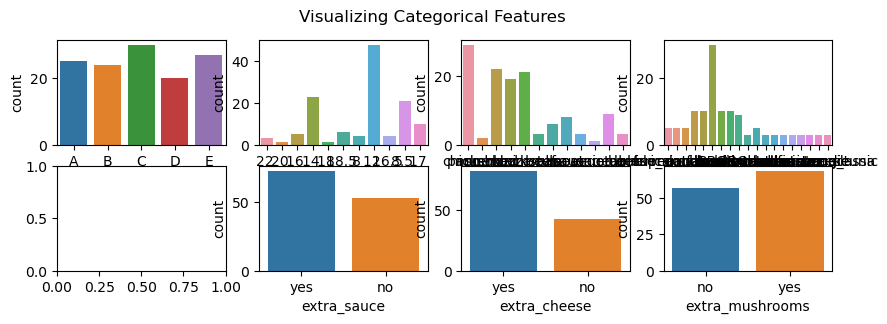

In [9]:
fig = plt.figure(figsize=(10,3))
fig.suptitle('Visualizing Categorical Features')
plt.subplot(2,4,1)
sns.countplot(x=df.company)
plt.subplot(2,4,2)
sns.countplot(x=df.diameter)
plt.subplot(2,4,3)
sns.countplot(x=df.topping)
plt.subplot(2,4,4)
sns.countplot(x=df.variant)
plt.subplot(2,4,5)
#sns.countplot(x=df.size)
plt.subplot(2,4,6)
sns.countplot(x=df.extra_sauce)
plt.subplot(2,4,7)
sns.countplot(x=df.extra_cheese)
plt.subplot(2,4,8)
sns.countplot(x=df.extra_mushrooms)
plt.show()

observation:
    1.medium size pizza ordered more
    2.extra_sauce,extra_cheese pizza order more.
    3.no more order form extra mashroom pizza

## 2.bivariate analysis analysis

### Categorical vs Numerical
Target is Numerical

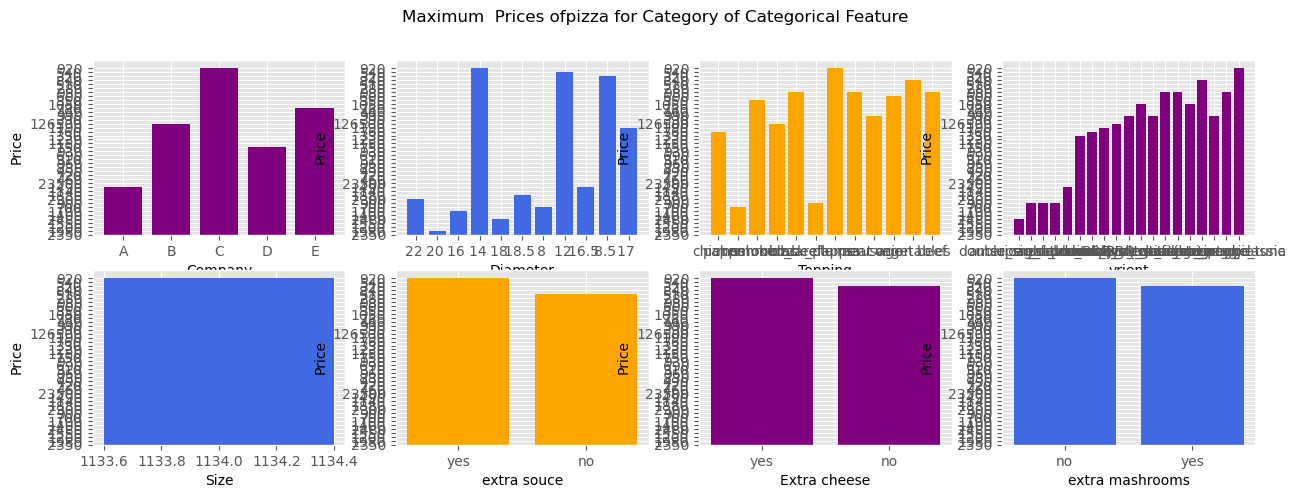

In [10]:
# Bar graph describes the Maximum Value of pizza its Numerical Feature

style.use('ggplot')
fig = plt.figure(figsize=(15,5))
fig.suptitle('Maximum  Prices ofpizza for Category of Categorical Feature')

# Subplot-1 for Comapany vs Price
plt.subplot(2,4,1)
plt.bar(df.company,df.price_rupiah, color = 'purple')
plt.xlabel('Company')
plt.ylabel('Price')

# Subplot-2 diameter  vs Price
plt.subplot(2,4,2)
plt.bar(df.diameter, df.price_rupiah, color = 'royalblue')
plt.xlabel('Diameter')
plt.ylabel('Price')


# Subplot-3 for topping vs Price
plt.subplot(2,4,3)
plt.bar(df.topping, df.price_rupiah, color = 'orange')
plt.xlabel('Topping')
plt.ylabel('Price')

# Subplot-4 for varient vs Price
plt.subplot(2,4,4)
plt.bar(df.variant,df.price_rupiah, color = 'purple')
plt.xlabel('vrient')
plt.ylabel('Price')

# Subplot-5 size  vs Price
plt.subplot(2,4,5)
plt.bar(df.size, df.price_rupiah, color = 'royalblue')
plt.xlabel('Size')
plt.ylabel('Price')


# Subplot-6 for extra_souce vs Price
plt.subplot(2,4,6)
plt.bar(df.extra_sauce, df.price_rupiah, color = 'orange')
plt.xlabel('extra souce')
plt.ylabel('Price')

# Subplot-7 for extra_cheese vs Price
plt.subplot(2,4,7)
plt.bar(df.extra_cheese,df.price_rupiah, color = 'purple')
plt.xlabel('Extra cheese')
plt.ylabel('Price')

# Subplot-8 extra_mashrooms  vs Price
plt.subplot(2,4,8)
plt.bar(df.extra_mushrooms, df.price_rupiah, color = 'royalblue')
plt.xlabel('extra mashrooms')
plt.ylabel('Price')

plt.show()

### 3.1 company

In [11]:
df['company'].value_counts()

C    30
E    27
A    25
B    24
D    20
Name: company, dtype: int64

In [12]:
df=pd.get_dummies(df,columns=['company'])
df

price_rupiah diameter      topping           variant     size extra_sauce  \
0           2350      22       chicken  double_signature    jumbo         yes   
1           1980      20     papperoni  double_signature    jumbo         yes   
2           1200      16     mushrooms  double_signature  reguler         yes   
3           1550      14   smoked_beef  double_signature  reguler         yes   
4           2480      18    mozzarella  double_signature    jumbo         yes   
..           ...      ...          ...               ...      ...         ...   
121          490      12   smoked_beef           crunchy   medium          no   
122          830      17       chicken          new_york       XL          no   
123          960      12     mushrooms     double_decker   medium          no   
124          440     8.5          meat   BBQ_meat_fiesta    small         yes   
125          780      12          meat   BBQ_meat_fiesta   medium          no   

    extra_cheese extra_mushrooms  company_A  company_B  company_C  company_D  \
0            yes              no          1          0          0          0   
1            yes              no          1          0          0          0   
2            yes             yes          1          0          0          0   
3             no             yes          1          0          0          0   
4             no             yes          1          0          0          0   
..           ...             ...        ...        ...        ...        ...   
121          yes              no          0          0          0          0   
122          yes              no          0          0          0          0   
123          yes             yes          0          0          0          0   
124           no             yes          0          0          0          0   
125           no             yes          0          0          0          0   

     company_E  
0            0  
1            0  
2            0  
3            0  
4            0  
..         ...  
121          1  
122          1  
123          1  
124          1  
125          1  

[126 rows x 13 columns]

In [13]:
df['diameter'].value_counts()

12       48
14       23
8.5      21
17       10
18.5      6
16        5
8         4
16.5      4
22        3
20        1
18        1
Name: diameter, dtype: int64

In [14]:
df['diameter'].value_counts().to_dict()

{'12 ': 48,
 '14 ': 23,
 '8.5 ': 21,
 '17 ': 10,
 '18.5 ': 6,
 '16 ': 5,
 '8 ': 4,
 '16.5 ': 4,
 '22 ': 3,
 '20 ': 1,
 '18 ': 1}

In [15]:
df['diameter']=df['diameter'].replace({'12': 49,
 '14': 2,
 '8.5': 1,
 '17': 5,
 '18.5': 6,
 '16': 3,
 '8': 0,
 '16.5': 4,
 '22': 8,
 '20': 7,
 '18': 6})

In [16]:
diameter_data={'12': 49,
 '14': 2,
 '8.5': 1,
 '17': 5,
 '18.5': 6,
 '16': 3,
 '8': 0,
 '16.5': 4,
 '22': 8,
 '20': 7,
 '18': 6}

### 3.3 topping

In [17]:
df['topping'].value_counts()

chicken         29
mushrooms       22
mozzarella      21
smoked_beef     19
vegetables       9
meat             8
tuna             6
black_papper     3
sausage          3
beef             3
papperoni        2
onion            1
Name: topping, dtype: int64

In [18]:
df['topping'].value_counts().to_dict()

{'chicken': 29,
 'mushrooms': 22,
 'mozzarella': 21,
 'smoked_beef': 19,
 'vegetables': 9,
 'meat': 8,
 'tuna': 6,
 'black_papper': 3,
 'sausage': 3,
 'beef': 3,
 'papperoni': 2,
 'onion': 1}

In [19]:
df['topping']=df['topping'].replace({'chicken': 12,
 'mushrooms': 8,
 'mozzarella': 7,
 'smoked_beef': 6,
 'tuna': 5,
 'vegetables': 7,
 'meat': 4,
 'black_papper': 3,
 'sausage': 3,
 'beef': 3,
 'papperoni': 2,
 'onion': 1})

In [20]:
topping_data={'chicken': 12,
 'mushrooms': 8,
 'mozzarella': 7,
 'smoked_beef': 6,
 'tuna': 5,
 'vegetables': 7,
 'meat': 4,
 'black_papper': 3,
 'sausage': 3,
 'beef': 3,
 'papperoni': 2,
 'onion': 1}

### 3.4 varient()

In [21]:
df['variant'].value_counts()

classic              30
meat_lovers          10
double_mix           10
crunchy              10
new_york             10
double_decker         9
double_signature      5
super_supreme         5
american_favorite     5
BBQ_meat_fiesta       5
gournet_greek         3
american_classic      3
thai_veggie           3
italian_veggie        3
spicy_tuna            3
meat_eater            3
extravaganza          3
BBQ_sausage           3
neptune_tuna          3
Name: variant, dtype: int64

In [22]:
df['variant'].value_counts().to_dict()

{'classic': 30,
 'meat_lovers': 10,
 'double_mix': 10,
 'crunchy': 10,
 'new_york': 10,
 'double_decker': 9,
 'double_signature': 5,
 'super_supreme': 5,
 'american_favorite': 5,
 'BBQ_meat_fiesta': 5,
 'gournet_greek': 3,
 'american_classic': 3,
 'thai_veggie': 3,
 'italian_veggie': 3,
 'spicy_tuna': 3,
 'meat_eater': 3,
 'extravaganza': 3,
 'BBQ_sausage': 3,
 'neptune_tuna': 3}

In [23]:
df['variant']=df['variant'].replace({'classic': 20,
 'meat_lovers': 19,
 'double_mix': 18,
 'crunchy': 17,
 'new_york': 16,
 'double_decker': 15,
 'double_signature': 14,
 'american_favorite': 13,
 'BBQ_meat_fiesta': 12,
 'super_supreme': 11,
 'spicy_tuna': 10,
 'BBQ_sausage': 9,
 'extravaganza': 8,
 'meat_eater': 7,
 'gournet_greek': 6,
 'italian_veggie': 5,
 'thai_veggie': 4,
 'american_classic': 3,
 'neptune_tuna': 2,
 'spicy_tuna': 1})

In [24]:
varient_data={'classic': 20,
 'meat_lovers': 19,
 'double_mix': 18,
 'crunchy': 17,
 'new_york': 16,
 'double_decker': 15,
 'double_signature': 14,
 'american_favorite': 13,
 'BBQ_meat_fiesta': 12,
 'super_supreme': 11,
 'spicy_tuna': 10,
 'BBQ_sausage': 9,
 'extravaganza': 8,
 'meat_eater': 7,
 'gournet_greek': 6,
 'italian_veggie': 5,
 'thai_veggie': 4,
 'american_classic': 3,
 'neptune_tuna': 2,
 'spicy tuna': 1}

In [25]:
df['variant'].value_counts()

20    30
19    10
18    10
17    10
16    10
15     9
14     5
11     5
13     5
12     5
6      3
3      3
4      3
5      3
1      3
7      3
8      3
9      3
2      3
Name: variant, dtype: int64

### 3.5 size

In [26]:
df['size'].value_counts()

medium     40
small      21
reguler    20
large      20
jumbo      15
XL         10
Name: size, dtype: int64

In [27]:
df['size'].value_counts().to_dict()

{'medium': 40, 'small': 21, 'reguler': 20, 'large': 20, 'jumbo': 15, 'XL': 10}

In [28]:
df['size']=df['size'].replace({'medium':1, 'small':0, 'large': 3, 'reguler': 2, 'jumbo': 5, 'XL': 4})

In [29]:
size_data={'medium':1, 'small':0, 'large': 3, 'reguler': 2, 'jumbo': 5, 'XL': 4}

In [30]:
df

price_rupiah diameter  topping  variant  size extra_sauce extra_cheese  \
0           2350      22        12       14     5         yes          yes   
1           1980      20         2       14     5         yes          yes   
2           1200      16         8       14     2         yes          yes   
3           1550      14         6       14     2         yes           no   
4           2480      18         7       14     5         yes           no   
..           ...      ...      ...      ...   ...         ...          ...   
121          490      12         6       17     1          no          yes   
122          830      17        12       16     4          no          yes   
123          960      12         8       15     1          no          yes   
124          440     8.5         4       12     0         yes           no   
125          780      12         4       12     1          no           no   

    extra_mushrooms  company_A  company_B  company_C  company_D  company_E  
0                no          1          0          0          0          0  
1                no          1          0          0          0          0  
2               yes          1          0          0          0          0  
3               yes          1          0          0          0          0  
4               yes          1          0          0          0          0  
..              ...        ...        ...        ...        ...        ...  
121              no          0          0          0          0          1  
122              no          0          0          0          0          1  
123             yes          0          0          0          0          1  
124             yes          0          0          0          0          1  
125             yes          0          0          0          0          1  

[126 rows x 13 columns]

### 3.6 extra_sauce

In [31]:
df['extra_sauce'].value_counts()

yes    73
no     53
Name: extra_sauce, dtype: int64

In [32]:
df['extra_sauce'].value_counts().to_dict()

{'yes': 73, 'no': 53}

In [33]:
df['extra_sauce']=df['extra_sauce'].replace({'yes': 76, 'no': 53})

In [34]:
sauce_data={'yes': 76, 'no': 53}

### 3.7 extra_cheese

In [35]:
df['extra_cheese'].value_counts()

yes    83
no     43
Name: extra_cheese, dtype: int64

In [36]:
df['extra_cheese'].value_counts().to_dict()

{'yes': 83, 'no': 43}

In [37]:
df['extra_cheese']=df['extra_cheese'].replace({'yes': 1, 'no': 0})

In [38]:
cheese_data={'yes': 1, 'no': 0}

### 3.8 extra_mushrooms

In [39]:
df['extra_mushrooms'].value_counts()

yes    69
no     57
Name: extra_mushrooms, dtype: int64

In [40]:
df['extra_mushrooms'].value_counts().to_dict()

{'yes': 69, 'no': 57}

In [41]:
df['extra_mushrooms']=df['extra_mushrooms'].replace({'yes':1, 'no':2})

In [42]:
mashroom_data={'yes':1, 'no':2}

In [43]:
df['price_rupiah'].value_counts()

720       10
900        8
460        7
960        5
830        5
490        5
750        5
700        4
1100       4
1490       4
1400       4
690        3
990        3
390        3
1150       3
780        3
350        3
600        3
440        3
930        3
310        3
23500      3
980        3
1230       2
330        2
760        2
1190       2
1140       2
1880       2
2300       2
1050       2
126500     2
280        1
510        1
840        1
320        1
540        1
2350       1
1980       1
2480       1
1550       1
1200       1
920        1
Name: price_rupiah, dtype: int64

In [44]:
df['price_rupiah']=df['price_rupiah'].astype(float)

# 4.feature selection

### train_test_split

In [45]:
x=df.drop('price_rupiah',axis=1)
y=df['price_rupiah']

In [46]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=15)

# Model Training

In [47]:
dt_reg=DecisionTreeRegressor()
dt_reg.fit(x_train,y_train)

DecisionTreeRegressor()

In [48]:
training_accuracy=dt_reg.score(x_train,y_train)
testing_accuracy=dt_reg.score(x_test,y_test)

plt.figure(figsize=(200,150))

plot_tree(dt_reg,feature_names=x.columns,filled=True)
plt.savefig("pizzadecisiontree.png")


In [49]:
y_pred=dt_reg.predict(x_test)
mse=mean_squared_error(y_test,y_pred)
print("mean_sqaured_error: ",mse)

rmse=np.sqrt(mse)
print("root mean sqaured error: ",rmse)

mae=mean_absolute_error(y_test,y_pred)
print('mean_absolute_erro',mae)

r2_value=r2_score(y_test,y_pred)
print("r2 sqaured value: ",r2_value)

mean_sqaured_error:  33950.0
root mean sqaured error:  184.2552577268828
mean_absolute_erro 91.15384615384616
r2 sqaured value:  0.9982454494925043


In [50]:
y_pred_train=dt_reg.predict(x_train)
mse=mean_squared_error(y_train,y_pred_train)
print("mean_sqaured_error: ",mse)

rmse=np.sqrt(mse)
print("root mean sqaured error: ",rmse)

mae=mean_absolute_error(y_train,y_pred_train)
print('mean_absolute_erro',mae)

r2_value=r2_score(y_train,y_pred_train)
print("r2 sqaured value: ",r2_value)

mean_sqaured_error:  0.0
root mean sqaured error:  0.0
mean_absolute_erro 0.0
r2 sqaured value:  1.0


observation: Testing accuracy:99%
        Training accuracy:100%

### testing on singal row

In [51]:
x_test[20:21].T

101
diameter         12 
topping           12
variant           20
size               1
extra_sauce       76
extra_cheese       0
extra_mushrooms    1
company_A          0
company_B          0
company_C          0
company_D          0
company_E          1

In [57]:
diameter='12'
topping='chicken'
variant='BBQ_meat_fiesta'
size='medium'
extra_sauce='yes'
extra_cheese='no'
extra_mushrooms='yes'
company='E'

column_name=x.columns.tolist()
company="company_" + company
company_index=column_name.index(company)
diameter=diameter_data[diameter]
topping=topping_data[topping]
variant=varient_data[variant]
size=size_data[size]
extra_sauce=sauce_data[extra_sauce]
extra_cheese=cheese_data[extra_cheese]
extra_mushrooms=mashroom_data[extra_mushrooms]

test_array=np.zeros([1,dt_reg.n_features_in_])
test_array[0][company_index]=1
test_array[0][0]=diameter
test_array[0][1]=topping
test_array[0][2]=variant
test_array[0][3]=size
test_array[0][4]=extra_sauce
test_array[0][5]=extra_cheese
test_array[0][6]=extra_mushrooms

predicted_price=dt_reg.predict(test_array)[0]
predicted_price

720.0

In [58]:
import pickle
import json

In [59]:
with open('pizza_dt.pkl','wb') as f:
    pickle.dump(dt_reg,f)

In [60]:
proj_data={'Diameter':diameter_data,'Topping':topping_data,'Variant':varient_data,'Size':size_data,'Extra_sauce':sauce_data,
           'Extra_cheese':cheese_data,'Extra_mushrooms':mashroom_data,'Column_name':column_name}

In [61]:
with open('proj_data.json','w') as f:
    json.dump(proj_data,f)